In [1]:
import json
import matplotlib.pyplot as plt
import visual
import numpy as np

In [4]:
def plot_file(fname, fig, Ax, required_symmetries={},scale=1):
    with open(fname, 'r') as f:
        data = json.load(f)
    
    # sweep = data['Jpm_sweep']
    
    for sector_results in data['sim_results']:
        skip=False
        for sym in required_symmetries:    
            if sector_results['sector'][sym] != required_symmetries[sym]:
                skip=True
                break

        if skip:
            continue

        label = str(sector_results['sector'])[1:-1]
        
        
        Jpm_vals = []
        ring_vals = []
        energy_vals = []
        for rf in sector_results['ring']:
            Jpm_vals.append(rf['Jpm'])
            ring_vals.append(rf['ringflip']['re'] + 1j*rf['ringflip']['im'])
            energy_vals.append(rf['energy'])
            
        
        Ax[0].plot(Jpm_vals, np.array(energy_vals)*scale, label = label)
        Ax[1].plot(Jpm_vals, np.real(ring_vals), label = label)
    
    Ax[1].legend()
    Ax[0].set_ylabel('energy')
    Ax[1].set_ylabel(r'$\mathrm{Re} \mathcal{O}$')



FileNotFoundError: [Errno 2] No such file or directory: 'old_out_pyro_1,0,0;0,1,0;0,0,1.json'

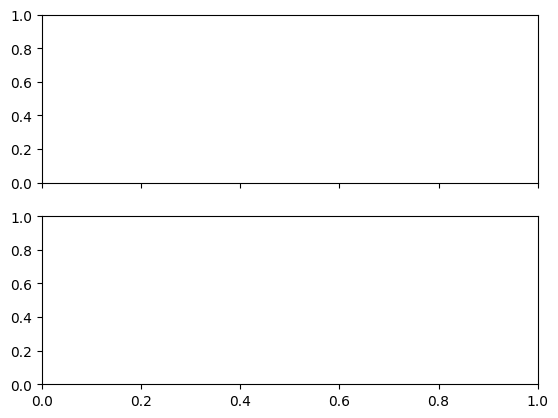

In [5]:
fig, Ax = plt.subplots(nrows=2, sharex=True)
plot_file("old_out_pyro_1,0,0;0,1,0;0,0,1.json", fig, Ax)
plot_file("out_pyro_1,0,0;0,1,0;0,0,1.json", fig, Ax)

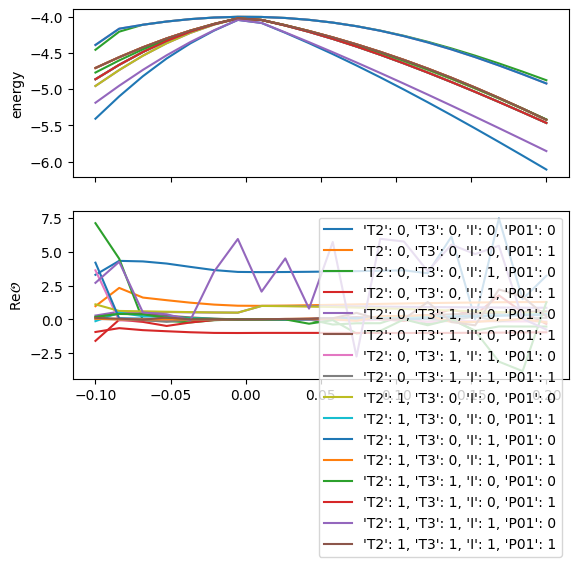

In [70]:
fig, Ax = plt.subplots(nrows=2, sharex=True)
# plot_file("out_pyro_1,0,0;0,1,0;0,0,1.json", fig, Ax,
#          {'P01':0},scale=1)
# plot_file("out_pyro_1,0,0;0,2,0;0,0,1.json", fig, Ax,
#          {'T3':0,'I':0,'P01':0},scale=1/2)

plot_file("out_pyro_1,0,0;0,2,0;0,0,2.json", fig, Ax,
         {}, scale=1/4)

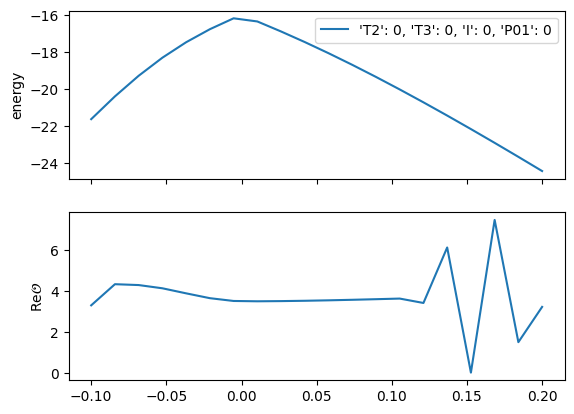

In [58]:
fig, Ax = plt.subplots(nrows=2, sharex=True)
plot_file("out_pyro_1,0,0;0,2,0;0,0,2.json", fig, Ax,
         {'T2':0, 'T3':0, 'P01':0,'I':0})